# Covid-19 Big Data analysis

The data contains almost 300 rows. The data was donloaded from **kaggle** in a *CSV* file.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"c:\Users\MASTER\Downloads\4. covid_19_data.csv")

Exploring the dataset and checking for null values

In [3]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
df.head(7)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192


In [5]:
df.tail()

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [6]:
df.shape

(321, 6)

In [7]:
df.columns


Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of           Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[321 rows x 6 columns]>

In [9]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [10]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

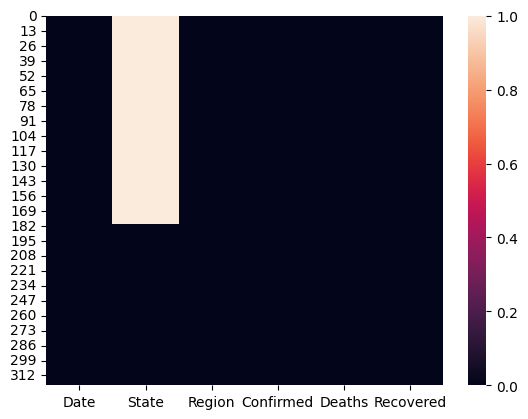

In [13]:
sns.heatmap(df.isnull())
plt.show()

## 1) Show the number of confirmed deaths and recovered cases in each region.

In [14]:
df.groupby('Region')[['Confirmed', 'Recovered']].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


## 2) Remove all the records where confiremed cases are less than 10.

In [15]:
df_lesser=df[df.Confirmed>10]
df_lesser.sort_values('Confirmed')

,Date,State,Region,Confirmed,Deaths,Recovered
318,4/29/2020,Yukon,Canada,11,0,0
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
217,4/29/2020,Greenland,Denmark,11,0,11
27,4/29/2020,NaN,Burundi,11,1,4
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


## 3) In which region, maximum number of cases were recorded?

In [16]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [17]:
max_df=df.groupby('Region').sum()
max_df.sort_values('Confirmed',ascending=False)

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
US,4/29/20204/29/20204/29/20204/29/20204/29/20204...,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,1039909,60967,120720
Spain,4/29/2020,0,236899,24275,132929
Italy,4/29/2020,0,203591,27682,71252
France,4/29/20204/29/20204/29/20204/29/20204/29/20204...,French GuianaFrench PolynesiaGuadeloupeMartini...,166543,24121,49118
UK,4/29/20204/29/20204/29/20204/29/20204/29/20204...,AnguillaBermudaBritish Virgin IslandsCayman Is...,166441,26166,857
...,...,...,...,...,...
Mauritania,4/29/2020,0,8,1,6
Papua New Guinea,4/29/2020,0,8,0,0
Bhutan,4/29/2020,0,7,0,5


In [18]:
max_1 = df.groupby('Region')['Confirmed'].max()
max_1.sort_values(ascending=False)

Region
US                  299691
Spain               236899
Italy               203591
UK                  165221
France              165093
                     ...  
Mauritania               8
Papua New Guinea         8
Bhutan                   7
Yemen                    6
Western Sahara           6
Name: Confirmed, Length: 187, dtype: int64

## 4) In which region, minimum number of deaths were recored?

In [19]:
min_death=df.groupby('Region')['Deaths'].sum().sort_values()
min_death.head(50)

Region
Cambodia                            0
Bhutan                              0
Dominica                            0
Central African Republic            0
Eritrea                             0
Fiji                                0
Holy See                            0
Mozambique                          0
Macau                               0
Madagascar                          0
Namibia                             0
Mongolia                            0
Nepal                               0
Laos                                0
Grenada                             0
Papua New Guinea                    0
Sao Tome and Principe               0
Seychelles                          0
South Sudan                         0
Uganda                              0
Yemen                               0
Timor-Leste                         0
Vietnam                             0
Western Sahara                      0
Saint Vincent and the Grenadines    0
Saint Lucia                         0
Saint

### 5) How many cases Confirmed, Death & Recovered cases were reported from India till Aprill 29,2020?

In [20]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [21]:
df[(df['Region']=='India')&(df['Date']<='4/29/2020')].groupby

<bound method DataFrame.groupby of          Date State Region  Confirmed  Deaths  Recovered
74  4/29/2020   NaN  India      33062    1079       8437>

### 6) Sort the entire data set wrt to number of confirmed cases .

In [22]:
df.sort_values('Confirmed')

,Date,State,Region,Confirmed,Deaths,Recovered
284,4/29/2020,Recovered,Canada,0,0,20327
285,4/29/2020,Recovered,US,0,0,120720
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
305,4/29/2020,Tibet,Mainland China,1,0,1
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


### 7) Sort the entire dataset wrt to Recovered cases in descending order.

In [23]:
df.sort_values(by=["Recovered"],ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
290,4/29/2020,Saskatchewan,Canada,383,6,0
299,4/29/2020,South Dakota,US,2373,13,0
298,4/29/2020,South Carolina,US,5882,231,0
302,4/29/2020,Tennessee,US,10366,195,0
